In [1]:
import sys
sys.path.append('./code')
from importlib import reload

In [2]:
import make_figure4
reload(make_figure4)
from make_figure4 import *
import pickle

from config import load_pileup_variables

(goodinds, merged_clustdict, merged_inds_to_subset, 
    cooldict_50kb, ind_to_gene, all_ind_to_region, my_treg_comp) = load_pileup_variables()



In [3]:
%load_ext autoreload
%autoreload
import scanpy as sc

sc.settings.set_figure_params(dpi=80, color_map='coolwarm', frameon=True)
plt.rcParams.update({'font.size': 12})
plt.rcParams.update({"axes.grid.axis" : 'both'})
plt.rcParams.update({"axes.grid" : True})

plt.rcParams.update({
    'axes.labelsize': 14,       # x and y labels' font size
    'xtick.labelsize': 8,      # x tick labels' font size
    'ytick.labelsize': 8,      # y tick labels' font size
    'axes.titlesize': 14,        # Axes title font size
    'patch.linewidth' : .35,
    'lines.linewidth' : .5,
    'legend.fontsize': 6,      # Legend font size
})
plt.rcParams['pdf.fonttype'] = 42

plt.rcParams.update({
    'axes.labelsize': 8,       # x and y labels' font size
    'xtick.labelsize': 6,      # x tick labels' font size
    'ytick.labelsize': 6,      # y tick labels' font size
    'axes.titlesize': 10,        # Axes title font size
    'patch.linewidth' : .35,
    'lines.linewidth' : .5,
    'xtick.major.pad' : 2,
    'ytick.major.pad' : 2,

})
plt.rcParams['axes.linewidth'] = .25
plt.rcParams['xtick.major.width'] = .25
plt.rcParams['ytick.major.width'] = .25
plt.rcParams['ytick.major.size'] = 2
plt.rcParams['xtick.major.size'] = 2
plt.rcParams['grid.linewidth'] = .25

plt.rcParams['axes.facecolor'] = 'none' # Or any suitable colour...
plt.rcParams['figure.facecolor'] = 'none'
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['savefig.facecolor'] = 'none'

In [4]:
from initialize import *
import cooler 

treg_250kb = cooler.Cooler('./Treg_all.mcool::/resolutions/250000')
treg_50kb = cooler.Cooler('./Treg_all.mcool::/resolutions/50000')
treg_25kb = cooler.Cooler('./Treg_all.mcool::/resolutions/25000')


(chromsizes, parsed_chroms, region_to_inds, 
    all_region_to_ind, inds_to_region, all_ind_to_region, 
    chrom_to_start, chrom_to_end) = initialize_helper_vars(treg_250kb)

In [5]:
gene_to_ind = pickle.load(open('gene_to_ind.p', 'rb'))

In [6]:
(chromsizes_25kb, parsed_chroms_25kb, region_to_inds_25kb, 
    all_region_to_ind_25kb, inds_to_region_25kb, all_ind_to_region_25kb, 
    chrom_to_start_25kb, chrom_to_end_25kb) = initialize_helper_vars(treg_25kb)

(chromsizes_50kb, parsed_chroms_50kb, region_to_inds_50kb, 
    all_region_to_ind_50kb, inds_to_region_50kb, all_ind_to_region_50kb, 
    chrom_to_start_50kb, chrom_to_end_50kb) = initialize_helper_vars(treg_50kb)

In [9]:
inter_and_intra_metadomains_treg = (  np.load('./intermediate_files/all_intra_treg_metadomains.npy')
                                    + np.load('./intermediate_files/all_inter_treg_metadomains.npy')
                                   )
inter_and_intra_metadomains_tcon = (  np.load('./intermediate_files/all_intra_tcon_metadomains.npy')
                                    + np.load('./intermediate_files/all_inter_tcon_metadomains.npy')
                                   )

In [10]:
SEs = pbt.BedTool('superenhancers/common_SE_liftover.bed')
SE_treg = pbt.BedTool('superenhancers/Treg_SE_liftover.bed')
# SE_tn = pbt.BedTool('superenhancers/Tn_SE_liftover.bed')
SEs = SEs.cat(SE_treg)#.cat(SE_tn)

SE_count = get_col(pbt.BedTool(add_chr_to_bedtool(all_ind_to_region)).intersect(SEs, c=True), -1).astype(int)

df = pd.DataFrame([np.where(SE_count)[0]]).T
df[1] = 'SE'
df.columns = ['ind', 'cluster']
df['chrom'] = [all_ind_to_region[x][0] for x in df['ind'].values]
df['chrom'] = df['chrom']

In [12]:
%autoreload 2
from hub_pileup import *
from compute_differential_hic_hub import *
from collections import defaultdict
from make_figure4 import *
import itertools
import cooler


cooldict = {
    'Treg' : treg_50kb,
}

from collections import defaultdict
from make_figure4 import *
from hub_pileup import *
import itertools

padding_size = 30

se_all_mat_dict, se_all_metadata = pileup_bins_with_hub(df, cooldict, 
                                                              chrom_to_start,
                                                              None, 
                                                              None, 
                                                              padding_size=padding_size, 
                                                              fetch_oe=True,
                                                              resolution_in = 250_000,
                                                              resolution_out = 50_000,
                                                              skip_metadomains = True,
                                                              intra=True,
                                                              inter=False)

/Genomics/pritykinlab/gabe/jupys/tregs/./code/hic_zscore_functions.py:148: RuntimeWarning: Mean of empty slice
  m = np.nanmean(np.diag(balanced_mat, k=off_diag_k))


Done with 1


/Genomics/pritykinlab/gabe/jupys/tregs/./code/hic_zscore_functions.py:148: RuntimeWarning: Mean of empty slice
  m = np.nanmean(np.diag(balanced_mat, k=off_diag_k))


Done with 10


/Genomics/pritykinlab/gabe/jupys/tregs/./code/hic_zscore_functions.py:148: RuntimeWarning: Mean of empty slice
  m = np.nanmean(np.diag(balanced_mat, k=off_diag_k))


Done with 11


/Genomics/pritykinlab/gabe/jupys/tregs/./code/hic_zscore_functions.py:148: RuntimeWarning: Mean of empty slice
  m = np.nanmean(np.diag(balanced_mat, k=off_diag_k))


Done with 12


/Genomics/pritykinlab/gabe/jupys/tregs/./code/hic_zscore_functions.py:148: RuntimeWarning: Mean of empty slice
  m = np.nanmean(np.diag(balanced_mat, k=off_diag_k))


Done with 13


/Genomics/pritykinlab/gabe/jupys/tregs/./code/hic_zscore_functions.py:148: RuntimeWarning: Mean of empty slice
  m = np.nanmean(np.diag(balanced_mat, k=off_diag_k))


Done with 14


/Genomics/pritykinlab/gabe/jupys/tregs/./code/hic_zscore_functions.py:148: RuntimeWarning: Mean of empty slice
  m = np.nanmean(np.diag(balanced_mat, k=off_diag_k))


Done with 15


/Genomics/pritykinlab/gabe/jupys/tregs/./code/hic_zscore_functions.py:148: RuntimeWarning: Mean of empty slice
  m = np.nanmean(np.diag(balanced_mat, k=off_diag_k))


Done with 16


/Genomics/pritykinlab/gabe/jupys/tregs/./code/hic_zscore_functions.py:148: RuntimeWarning: Mean of empty slice
  m = np.nanmean(np.diag(balanced_mat, k=off_diag_k))


Done with 17


/Genomics/pritykinlab/gabe/jupys/tregs/./code/hic_zscore_functions.py:148: RuntimeWarning: Mean of empty slice
  m = np.nanmean(np.diag(balanced_mat, k=off_diag_k))


Done with 18


/Genomics/pritykinlab/gabe/jupys/tregs/./code/hic_zscore_functions.py:148: RuntimeWarning: Mean of empty slice
  m = np.nanmean(np.diag(balanced_mat, k=off_diag_k))


Done with 19


/Genomics/pritykinlab/gabe/jupys/tregs/./code/hic_zscore_functions.py:148: RuntimeWarning: Mean of empty slice
  m = np.nanmean(np.diag(balanced_mat, k=off_diag_k))


Done with 2


/Genomics/pritykinlab/gabe/jupys/tregs/./code/hic_zscore_functions.py:148: RuntimeWarning: Mean of empty slice
  m = np.nanmean(np.diag(balanced_mat, k=off_diag_k))


Done with 3


/Genomics/pritykinlab/gabe/jupys/tregs/./code/hic_zscore_functions.py:148: RuntimeWarning: Mean of empty slice
  m = np.nanmean(np.diag(balanced_mat, k=off_diag_k))


Done with 4


/Genomics/pritykinlab/gabe/jupys/tregs/./code/hic_zscore_functions.py:148: RuntimeWarning: Mean of empty slice
  m = np.nanmean(np.diag(balanced_mat, k=off_diag_k))


Done with 5


/Genomics/pritykinlab/gabe/jupys/tregs/./code/hic_zscore_functions.py:148: RuntimeWarning: Mean of empty slice
  m = np.nanmean(np.diag(balanced_mat, k=off_diag_k))


Done with 6


/Genomics/pritykinlab/gabe/jupys/tregs/./code/hic_zscore_functions.py:148: RuntimeWarning: Mean of empty slice
  m = np.nanmean(np.diag(balanced_mat, k=off_diag_k))


Done with 7


/Genomics/pritykinlab/gabe/jupys/tregs/./code/hic_zscore_functions.py:148: RuntimeWarning: Mean of empty slice
  m = np.nanmean(np.diag(balanced_mat, k=off_diag_k))


Done with 8


/Genomics/pritykinlab/gabe/jupys/tregs/./code/hic_zscore_functions.py:148: RuntimeWarning: Mean of empty slice
  m = np.nanmean(np.diag(balanced_mat, k=off_diag_k))


Done with 9


/Genomics/pritykinlab/gabe/jupys/tregs/./code/hic_zscore_functions.py:148: RuntimeWarning: Mean of empty slice
  m = np.nanmean(np.diag(balanced_mat, k=off_diag_k))


Done with X


In [13]:
chrom1 = [all_ind_to_region_50kb[x][0] for x in se_all_metadata['ind1']]
chrom2 = [all_ind_to_region_50kb[x][0] for x in se_all_metadata['ind2']]

se_all_metadata['chrom1'] = chrom1
se_all_metadata['chrom2'] = chrom2

In [14]:
# x = (se_all_metadata['ind1'] - [chrom_to_start_50kb[x] for x in se_all_metadata['chrom1']])//5
# y = (se_all_metadata['ind2'] - [chrom_to_start_50kb[x] for x in se_all_metadata['chrom2']])//5

x = se_all_metadata['ind1']
y = se_all_metadata['ind2']
has_se = inter_and_intra_connections_treg[x, y].astype(object)
print(has_se.sum())
# has_se = inter_and_intra_connections_treg[x:x+2, y:y+2].astype(object).any(axis=(1, 2))
has_se[has_se > 0] = 'With Megaloop'
has_se[has_se == 0] = 'Without Megaloop'

se_all_metadata['cluster1'] = has_se.astype(str)
se_all_metadata['cluster2'] = has_se.astype(str)


se_all_metadata.loc[(se_all_metadata['ind1'] - se_all_metadata['ind2']).abs() < 8, 'cluster1'] = '<2Mb'
se_all_metadata.loc[(se_all_metadata['ind1'] - se_all_metadata['ind2']).abs() < 8, 'cluster2'] = '<2Mb'

746.0


### Figure 2I

/Genomics/pritykinlab/gabe/jupys/tregs/./code/hub_pileup.py:280: UserWarning: FixedFormatter should only be used together with FixedLocator
  a.set_yticklabels([-cutoff, "Anchor1", cutoff])
/Genomics/pritykinlab/gabe/jupys/tregs/./code/hub_pileup.py:396: RuntimeWarning: Mean of empty slice
  mat = np.nanmean(mats, axis=0)
/Genomics/argo/users/gdolsten/.conda/envs/mamba/envs/new_3dgenome/lib/python3.10/site-packages/scipy/stats/_stats_py.py:9205: RuntimeWarning: invalid value encountered in scalar divide
  z = (s - expected) / np.sqrt(n1*n2*(n1+n2+1)/12.0)
/Genomics/pritykinlab/gabe/jupys/tregs/./code/compute_differential_hic_hub.py:134: RuntimeWarning: Mean of empty slice
  delta = np.nanmean(v_middle.clip(cliplo, cliphigh)) - np.nanmean(v_outside.clip(cliplo, cliphigh))
/Genomics/pritykinlab/gabe/jupys/tregs/./code/hub_pileup.py:317: UserWarning: FixedFormatter should only be used together with FixedLocator
  a.set_yticklabels([-cutoff, "Anchor1", cutoff])


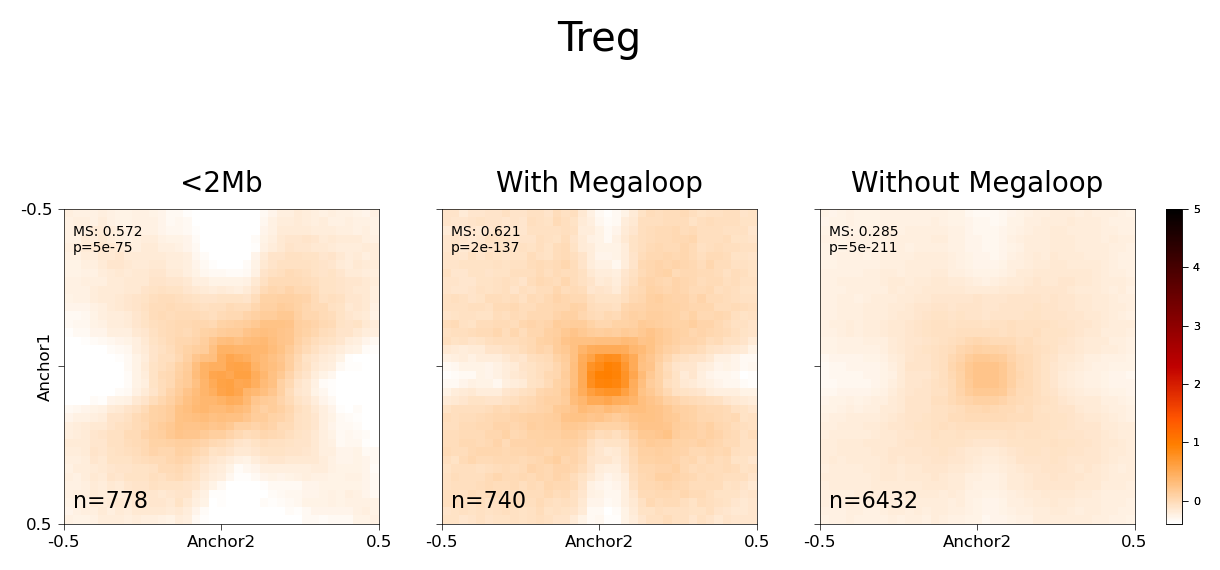

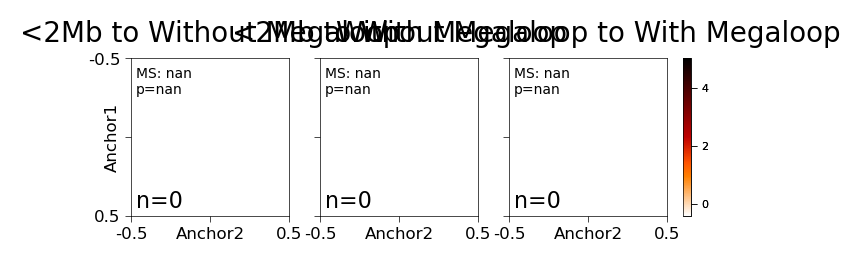

In [247]:
!mkdir -p plots/se_treg
newline = '\n'
all_results_dicts = {}
for key in se_all_mat_dict:
    (fig_within_cluster, fig_between_cluster), results = plot_cluster_pileups_from_result(key, se_all_mat_dict, se_all_metadata,
                                     se_all_metadata['cluster1'].unique(),
                                     res = 25_000,
                                     vmax =  5,
                                     vmin = -.4,
                                     columns_to_names = {'With Megaloop' : 'With Megaloop', 
                                                         'Without Megaloop': 'Without Megaloop',
                                                         '<2Mb': '<2Mb',
                                                        },
                                     row_colors_dict = {'With Megaloop' : 'black', 
                                                        'Without Megaloop': 'black',
                                                        '<2Mb': 'black',
                                                       },
                                    # show
                                     # s1 = 38, s2 = -38,
                                        s1 = 11, s2 = -11,
                                     center = 3,
                                                                                          # show_filts=True,
                                                                                          center_method='None',
                                                                                          fgsz=(40*mm, 40*mm),
                                    )
    fig_within_cluster.suptitle(f"{key}", y=4, x=1.7, ha='center')
    all_results_dicts[key] = results
    fig_within_cluster.savefig(f'./plots/se_treg/{key}_within_cluster.pdf', bbox_inches='tight')

In [16]:
from aux_functions import format_pval_as_asterisks

def add_stat_annotation(ax, data, xcol, ycol, hue, order, hue_order, box_pairs):
    """ Add statistical annotations for comparing hue within each x."""
    unique_x = data[xcol].unique()
    hue_levels = data[hue].unique()
    
    # Prepare a mapping from hue and x to x-tick positions
    hue_offsets = {hue: (i-1)*.15 for i, hue in enumerate(hue_order)}
    x_positions = {v: k for k, v in enumerate(order)}

    seen = set()
    for pair in box_pairs:
        if pair[0][0] not in seen:
            seen.add(pair[0][0])
            yoff = 0 
        else:
            yoff += .15
        # Filter data for each pair

        data1 = data[(data[xcol] == pair[0][0]) & (data[hue] == pair[0][1])].dropna()
        data2 = data[(data[xcol] == pair[1][0]) & (data[hue] == pair[1][1])].dropna()
        print(data1.shape, data2.shape, xcol)
        # return data1[ycol], data2[ycol]
        # Perform rank sum test
        stat, p_value = scipy.stats.ranksums(data1[ycol], data2[ycol])
    
        # Find positions for annotations
        x1 = x_positions[pair[0][0]] + hue_offsets[pair[0][1]]
        x2 = x_positions[pair[1][0]] + hue_offsets[pair[1][1]]

        ymax = .25
        y, h, col = ymax + 0.02, 0.01, 'k'

        y = y * (1 + yoff)
        # Draw the lines and annotations
        ax.plot([x1, x1, x2, x2], [y, y + h, y + h, y], lw=.2, c=col)
        ax.text((x1 + x2) * .5, y + h, f'{format_pval_as_asterisks(p_value)}', ha='center', va='bottom', color=col,
               fontsize=4)

/Genomics/argo/users/gdolsten/.conda/envs/mamba/envs/new_3dgenome/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Genomics/argo/users/gdolsten/.conda/envs/mamba/envs/new_3dgenome/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Genomics/argo/users/gdolsten/.conda/envs/mamba/envs/new_3dgenome/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Comparison of With Megaloop and Without Megaloop
p-value: 1.2150810283975791e-102
stat: 21.511501117952747


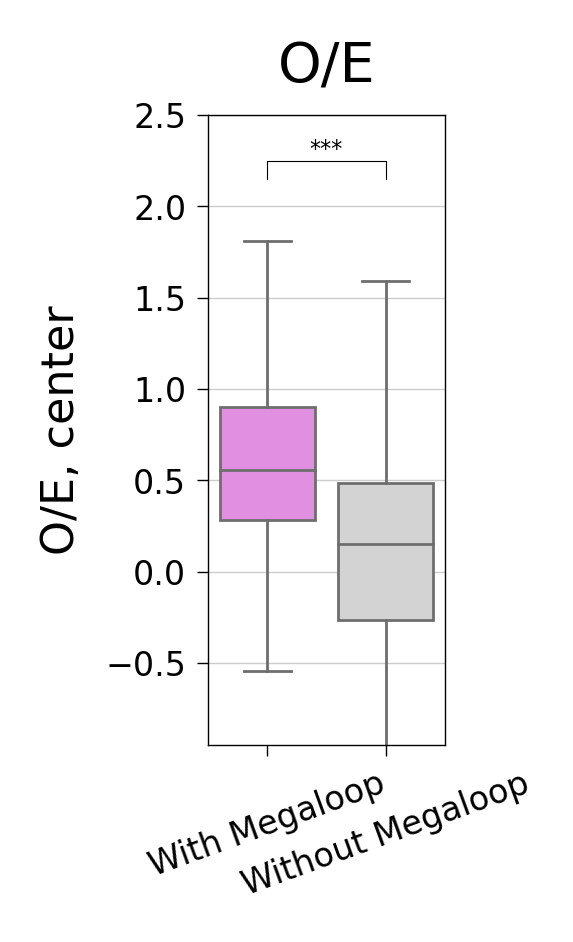

In [17]:
%autoreload 2
from plot_pvals import add_stat_annotation_boxplot_no_hue
from itertools import combinations

all_datas = []
for u in ['With Megaloop', 'Without Megaloop']:
    idx = (se_all_metadata['cluster1']==u) & (se_all_metadata['cluster2']==u)
    data = pd.DataFrame()
    for key in se_all_mat_dict:
        difference = all_results_dicts[key][u]['v_middle']
        data[key] = difference
    data['cluster'] = u
    all_datas.append(data)

data = pd.concat(all_datas, axis=0)
data = data.melt('cluster')

order = ['Treg']
hue_order = ['With Megaloop', 'Without Megaloop']
pairs = [((x, h1), (x, h2)) for x in order for h1, h2 in combinations(hue_order, 2)]

fig, axs = init_subplots_exact(1, 1, fgsz=(15*mm, 40*mm), dpi = 200)
sns.boxplot(data=data, x='cluster', y='value', fliersize=0,
           hue_order = hue_order,
           palette=['violet', 'lightgray', ]
           )
plt.ylim([-.95, 2.5])
plt.gca().set_axisbelow(True)
# add_stat_annotation(plt.gca(), data, 'variable', 'value', 'cluster', order, hue_order, pairs)
add_stat_annotation_boxplot_no_hue(plt.gca(), data, 'cluster', 'value', hue_order, [hue_order], ymax=1.85, delta = .15, h = 0.1,
                                  log=True)

plt.xlabel("")
plt.ylabel("O/E, center")
plt.title("O/E")
plt.xticks(rotation=20)
fig.savefig('./plots/se_treg/quantification.pdf', bbox_inches = 'tight')